In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [221]:
data_raw=pd.read_csv("./dataset/Twitch_game_data.csv")
data_raw.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


In [222]:
data_raw.shape

(13200, 12)

In [223]:
data_raw.isnull().any()

Rank                False
Game                 True
Month               False
Year                False
Hours_watched       False
Hours_Streamed      False
Peak_viewers        False
Peak_channels       False
Streamers           False
Avg_viewers         False
Avg_channels        False
Avg_viewer_ratio    False
dtype: bool

In [224]:
data_raw.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


In [225]:
data2 = data_raw.drop(columns=['Rank', 'Month', 'Year','Peak_viewers', 'Peak_channels','Streamers','Avg_viewer_ratio'])
data2['Hours_Streamed'] = data2['Hours_Streamed'].str.replace(' hours','')
data2['Hours_Streamed'] = data2['Hours_Streamed'].astype('int64')
data2.shape[0]

13200

In [226]:
data2.dtypes

Game              object
Hours_watched      int64
Hours_Streamed     int64
Avg_viewers        int64
Avg_channels       int64
dtype: object

In [227]:
data2.head()

,Game,Hours_watched,Hours_Streamed,Avg_viewers,Avg_channels
0,League of Legends,94377226,1362044,127021,1833
1,Counter-Strike: Global Offensive,47832863,830105,64378,1117
2,Dota 2,45185893,433397,60815,583
3,Hearthstone,39936159,235903,53749,317
4,Call of Duty: Black Ops III,16153057,1151578,21740,1549


In [228]:
data2 = data2.dropna()
data2.shape[0]

13199

In [229]:
data2_game_count = data2.drop_duplicates('Game')
data2_game_count.shape[0]

1676

In [230]:
data2_game_count.tail()

,Game,Hours_watched,Hours_Streamed,Avg_viewers,Avg_channels
13180,Ni no Kuni: Cross Worlds,780276,12473,1085,17
13182,Sniper Ghost Warrior Contracts 2,778271,16694,1082,23
13187,Phantasy Star Online 2 New Genesis,741489,39313,1031,54
13191,Phantom Abyss,726467,8813,1010,12
13196,Muck,701456,31741,975,44


In [231]:
new_cols = {'Hours_watched': 'Total_Hours_Watched', 'Hours_Streamed':'Total_Hours_Streamed', 'Avg_viewers':'Total_Avg_Viewers','Avg_channels':'Total_Avg_Channels'}
data2_grouped_1=data2.groupby('Game').agg({'Hours_watched':'sum', 'Hours_Streamed':'sum', 'Avg_viewers':'sum', 'Avg_channels':'sum'}).rename(columns=new_cols).reset_index()

data2_grouped_1.head()

,Game,Total_Hours_Watched,Total_Hours_Streamed,Total_Avg_Viewers,Total_Avg_Channels
0,.hack//G.U. Last Recode,145350,35258,202,49
1,60 Parsecs!,529688,1867,736,2
2,60 Seconds!,2834105,9208,3824,6
3,7 Days to Die,53420415,4767018,72976,6495
4,<U+014C>kami,181539,19273,244,25


In [232]:
data2_grouped_1.shape[0]

1676

In [234]:
data2_grouped_1.loc[data2_grouped_1['Game'] == "60 Seconds!"]

,Game,Total_Hours_Watched,Total_Hours_Streamed,Total_Avg_Viewers,Total_Avg_Channels
2,60 Seconds!,2834105,9208,3824,6


In [ ]:
import random


data2_grouped_1["Total_Hours_Watched%Total_Hours_Streamed"] = data2_grouped_1["Total_Hours_Watched"] / data2_grouped_1["Total_Hours_Streamed"] 

data2_grouped_1["Total_Avg_Viewers%Total_Avg_Channels"] = data2_grouped_1["Total_Avg_Viewers"] / data2_grouped_1["Total_Avg_Channels"]

data2_grouped_1.replace([np.inf, -np.inf], random.uniform(1,9), inplace=True)

data2_grouped_1.head()









In [236]:
data2_grouped_1

,Game,Total_Hours_Watched,Total_Hours_Streamed,Total_Avg_Viewers,Total_Avg_Channels,Total_Hours_Watched%Total_Hours_Streamed,Total_Avg_Viewers%Total_Avg_Channels
0,.hack//G.U. Last Recode,145350,35258,202,49,4.122469,4.122449
1,60 Parsecs!,529688,1867,736,2,283.710766,368.000000
2,60 Seconds!,2834105,9208,3824,6,307.787250,637.333333
3,7 Days to Die,53420415,4767018,72976,6495,11.206254,11.235720
4,<U+014C>kami,181539,19273,244,25,9.419343,9.760000
...,...,...,...,...,...,...,...
1671,osu!,62135067,8123877,85229,11117,7.648450,7.666547
1672,rFactor 2,645424,3489,897,4,184.988249,224.250000
1673,skribbl.io,4445831,141245,6177,193,31.476024,32.005181
1674,some some convenience store,342876,4683,461,6,73.217168,76.833333


In [237]:
data2_grouped_1.iloc[0]["Total_Hours_Watched%Total_Hours_Streamed"]

4.122468659594985

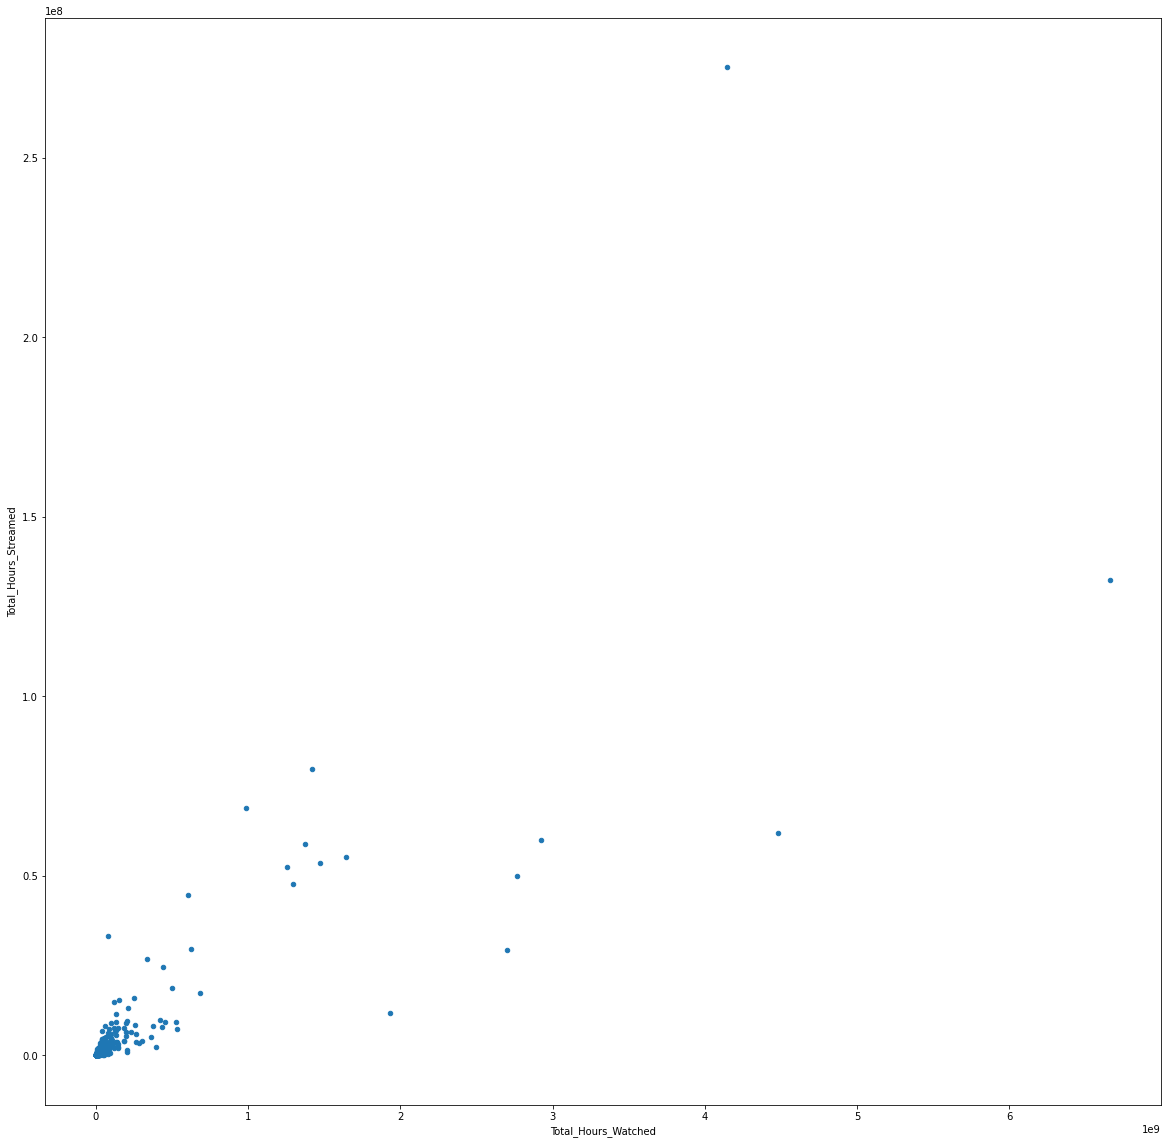

In [238]:
plt.figure(figsize=(20,20))
plt.scatter(data2_grouped_1['Total_Hours_Watched'],data2_grouped_1['Total_Hours_Streamed'],s=20)
# plt.scatter(data2_grouped_1['Total_Hours_Watched%Total_Hours_Streamed'],data2_grouped_1['Total_Avg_Viewers%Total_Avg_Channels'],s=10)
# plt.scatter(data2_grouped_1.iloc[0]["Total_Hours_Watched%Total_Hours_Streamed"],data2_grouped_1.iloc[0]["Total_Avg_Viewers%Total_Avg_Channels"])
plt.xlabel('Total_Hours_Watched')
plt.ylabel('Total_Hours_Streamed')
plt.show()

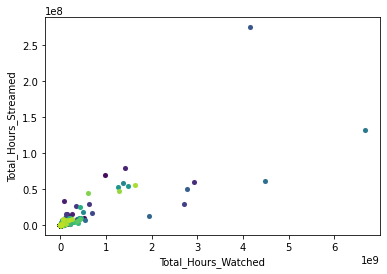

<Figure size 576x576 with 0 Axes>

In [240]:

fig, ax = plt.subplots()

plt.xlabel('Total_Hours_Watched')
plt.ylabel('Total_Hours_Streamed')
plt.figure(figsize=(8, 8))


colormap = cm.viridis
colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(data2_grouped_1['Game']))]

for i,c in enumerate(colorlist):

    x = data2_grouped_1['Total_Hours_Watched'][i]
    y = data2_grouped_1['Total_Hours_Streamed'][i]
    l = data2_grouped_1['Game'][i]

    ax.scatter(x, y, label=l, s=25, linewidth=0.1, c=c)

plt.show()

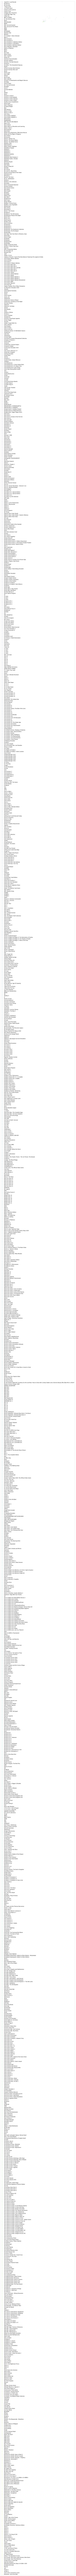

In [241]:

fig, ax = plt.subplots()
plt.xlabel('Total_Hours_Watched')
plt.ylabel('Total_Hours_Streamed')



colormap = cm.viridis
colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(data2_grouped_1['Game']))]

for i,c in enumerate(colorlist):

    x = data2_grouped_1['Total_Hours_Watched'][i]
    y = data2_grouped_1['Total_Hours_Streamed'][i]
    l = data2_grouped_1['Game'][i]

    ax.scatter(x, y, label=l, s=10, linewidth=0.1, c=c)

ax.legend()
ax.axis("off")
plt.show()

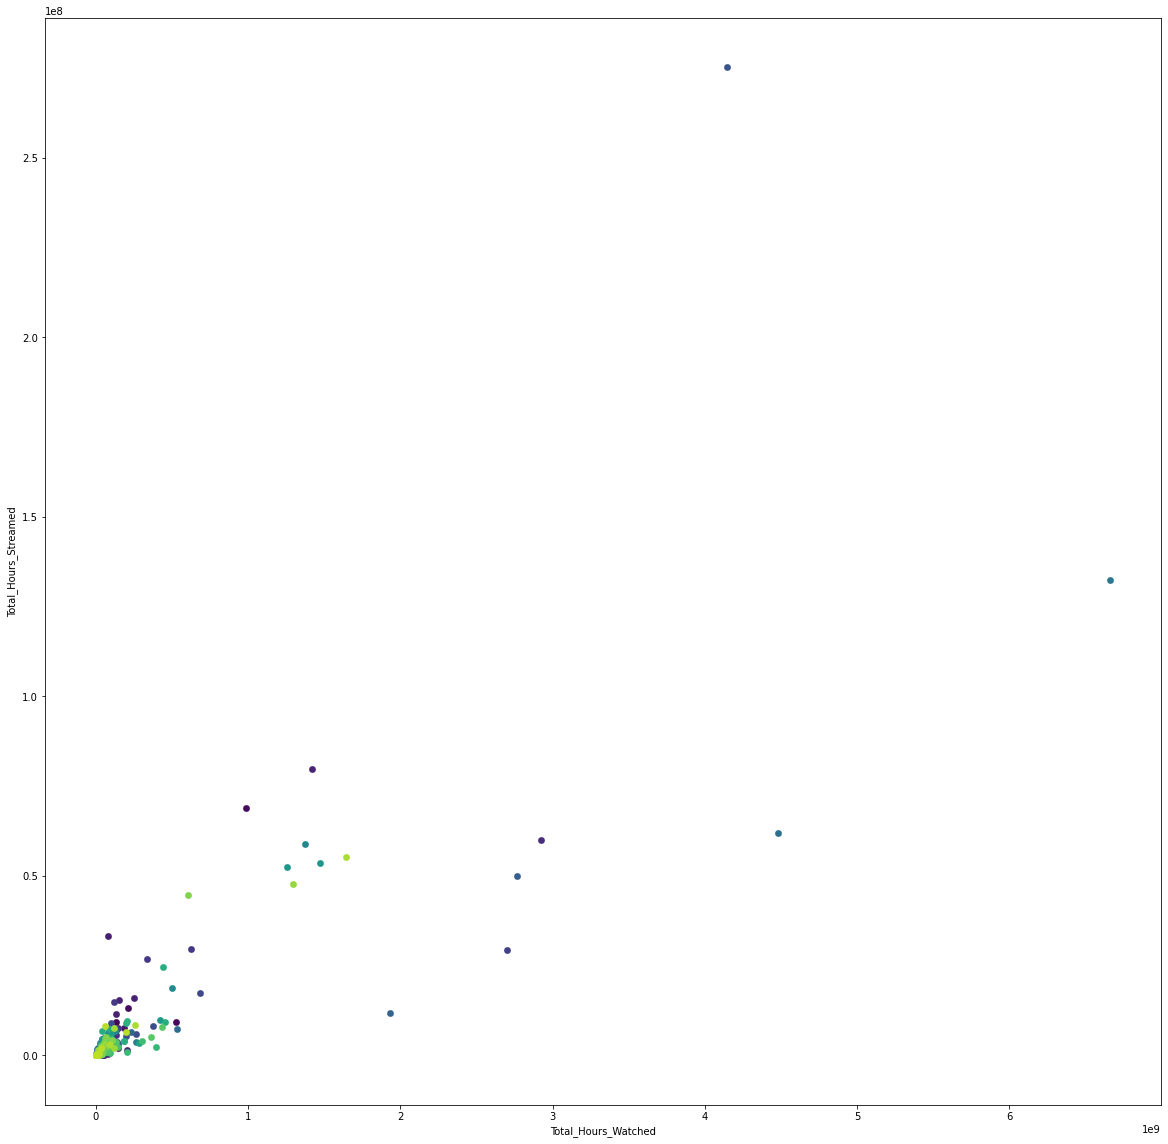

In [242]:
plt.figure(figsize=(20,20))

plt.xlabel('Total_Hours_Watched')
plt.ylabel('Total_Hours_Streamed')

colormap = cm.viridis
colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(data2_grouped_1['Game']))]

for i,c in enumerate(colorlist):

    x = data2_grouped_1['Total_Hours_Watched'][i]
    y = data2_grouped_1['Total_Hours_Streamed'][i]
    l = data2_grouped_1['Game'][i]

    plt.scatter(x, y, label=l, s=45, linewidth=0.1, c=c)

plt.show()

In [243]:
x=data2_grouped_1[['Total_Hours_Watched','Total_Hours_Streamed']]

In [244]:
from sklearn.preprocessing import StandardScaler


ms=StandardScaler()
stand=ms.fit_transform(x)

In [250]:

kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(stand)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [251]:
prediction=kmeans.fit_predict(stand)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [252]:
new_data=data2_grouped_1.copy()
new_data['cluster']=prediction
new_data.head()

,Game,Total_Hours_Watched,Total_Hours_Streamed,Total_Avg_Viewers,Total_Avg_Channels,Total_Hours_Watched%Total_Hours_Streamed,Total_Avg_Viewers%Total_Avg_Channels,cluster
0,.hack//G.U. Last Recode,145350,35258,202,49,4.122469,4.122449,0
1,60 Parsecs!,529688,1867,736,2,283.710766,368.000000,0
2,60 Seconds!,2834105,9208,3824,6,307.787250,637.333333,0
3,7 Days to Die,53420415,4767018,72976,6495,11.206254,11.235720,0
4,<U+014C>kami,181539,19273,244,25,9.419343,9.760000,0


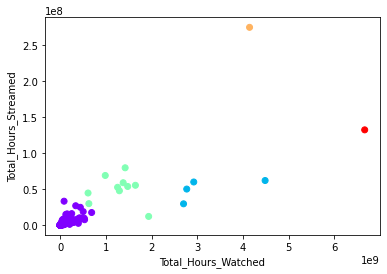

In [253]:
plt.scatter(data2_grouped_1['Total_Hours_Watched'],new_data["Total_Hours_Streamed"],c=new_data['cluster'],cmap='rainbow')
plt.xlabel('Total_Hours_Watched')
plt.ylabel('Total_Hours_Streamed')
plt.show()

In [258]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data2_grouped_1.index.values
cluster_map['cluster'] = kmeans.labels_

cluster_map[cluster_map.cluster == 3]

,data_index,cluster
499,499,3


In [259]:
data2_grouped_1.iloc[499]

Game                                          Fortnite
Total_Hours_Watched                         4143704994
Total_Hours_Streamed                         275193901
Total_Avg_Viewers                              5679729
Total_Avg_Channels                              377261
Total_Hours_Watched%Total_Hours_Streamed       15.0574
Total_Avg_Viewers%Total_Avg_Channels           15.0552
Name: 499, dtype: object